In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
%pylab inline
import os
from utils import ImagePlotter
from flyem_syn_eval import eval as flyem_eval
IP = ImagePlotter()

/groups/turaga/home/krauser/anaconda2/envs/flyem_eval/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


RUN 33, CX, iteration = 310000
Training settings:
    SOLVER: learning rate = 1e-6
    NETWORK:
        features maps to start: 24
        increase/decrease fmaps by factor = 3
        depth: 3
    DATA: trained on cx1_1
    LOSS: euclid

In [4]:
# RUN 33 310000
cx1_2_33_310000_d10_json_filename = os.path.join(os.getenv("HOME")+'/projects/syntist/processing', '20170707', '222729', '310000','cx1_2_syn_locations_sigma2_minpeakdist10.json')
cx1_2_33_310000_d10_results_turagalab = flyem_eval.evaluate_pr(flyem_eval.Tbar_Info(cx1_2_33_310000_d10_json_filename),
                                                 flyem_eval.cx_synapse_groundtruth('2'),
                                                 conf_thresholds=np.arange(0.0,0.98,0.02))

In [54]:
# RUN 45 100000
cx1_2_45_100000_d10_json_filename = os.path.join(os.getenv("HOME")+'/projects/syntist/processing', '20170708', '091423', '100000','cx1_2_presyn_locations_sigma2_minpeakdist10.json')
cx1_2_45_100000_d10_results_turagalab = flyem_eval.evaluate_pr(flyem_eval.Tbar_Info(cx1_2_45_100000_d10_json_filename),
                                                 flyem_eval.cx_synapse_groundtruth('2'),
                                                 conf_thresholds=np.arange(0.0,0.98,0.02))

In [7]:
# RUN 45 100000 iterative local peak detection
cx1_2_45_100000_d5_it27_json_filename = os.path.join(os.getenv("HOME")+'/projects/syntist/processing', '20170708', '091423', '100000','cx1_2_presyn_locations_sigma2_minpeakdist5_it27.json')
cx1_2_45_100000_d5_it27_results_turagalab = flyem_eval.evaluate_pr(flyem_eval.Tbar_Info(cx1_2_45_100000_d5_it27_json_filename),
                                                 flyem_eval.cx_synapse_groundtruth('2'),
                                                 conf_thresholds=np.arange(0.0,0.98,0.02))

In [52]:
# FLYEM
cx1_2_results_flyem = flyem_eval.evaluate_pr(flyem_eval.Tbar_Info('fpl_unet_pred_cx1_2_baseline', 'emdata2:8000','cb7dc','roi_cx1_2'),
                                             flyem_eval.cx_synapse_groundtruth('2'),
                                             conf_thresholds=np.arange(0.7,0.98,0.02))

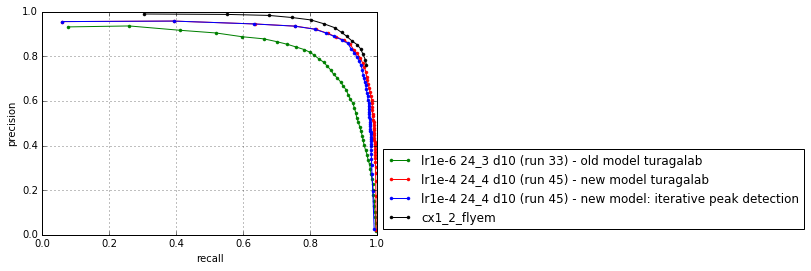

In [61]:
# T-BARS, with iterative peak detection
fig, ax = plt.subplots()
ax.plot(cx1_2_33_310000_d10_results_turagalab.rr, cx1_2_33_310000_d10_results_turagalab.pp, 'g.-', label='lr1e-6 24_3 d10 (run 33) - old model turagalab')
ax.plot(cx1_2_45_100000_d10_results_turagalab.rr, cx1_2_45_100000_d10_results_turagalab.pp, 'r.-', label='lr1e-4 24_4 d10 (run 45) - new model turagalab')
ax.plot(cx1_2_45_100000_d5_it27_results_turagalab.rr, cx1_2_45_100000_d5_it27_results_turagalab.pp, 'b.-', label='lr1e-4 24_4 d10 (run 45) - new model: iterative peak detection')
ax.plot(cx1_2_results_flyem.rr, cx1_2_results_flyem.pp, 'k.-', label='cx1_2_flyem')
legend = ax.legend(loc='lower left', bbox_to_anchor=(1, 0))
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid()
plt.show()